### 1) Setup & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cols = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal","target"
]
df = pd.read_csv(url, names=cols)
df.to_csv("heart_disease.csv", index=False)

## 2) Quick EDA

In [3]:
print(df.shape)
print(df.head())
display(df.info())
display(df.describe(include='all'))
df.isna().sum()

(303, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol     

None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 3) Basic Cleaning

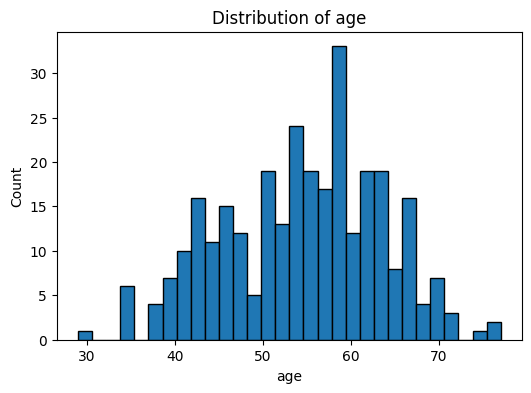

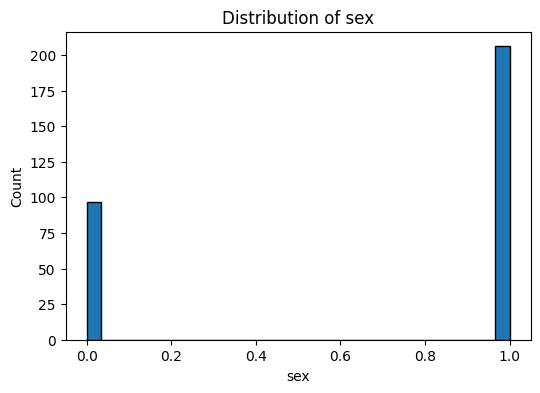

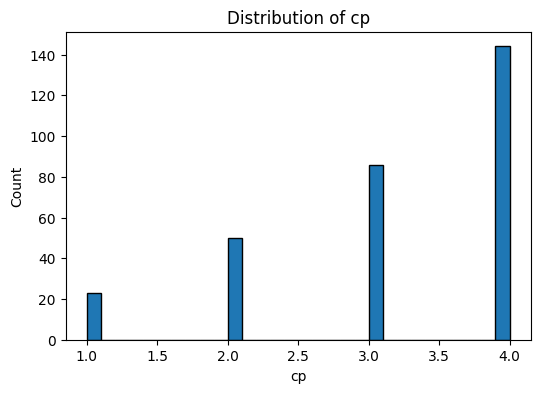

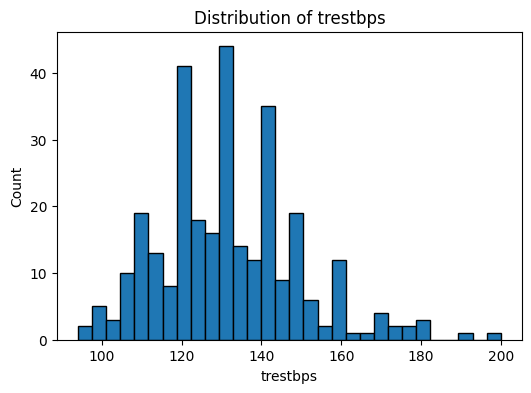

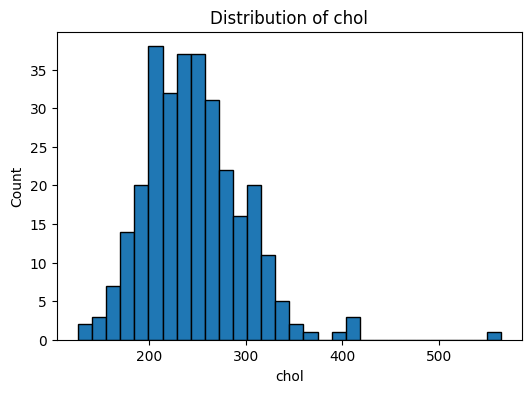

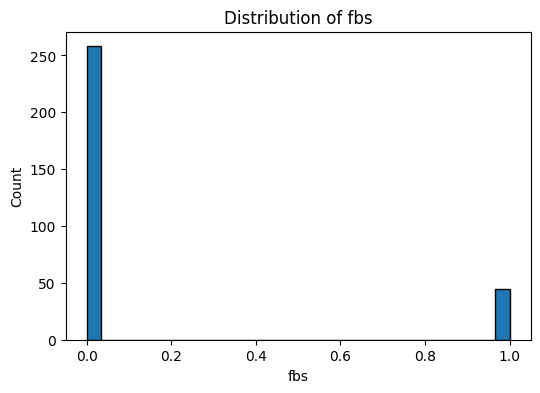

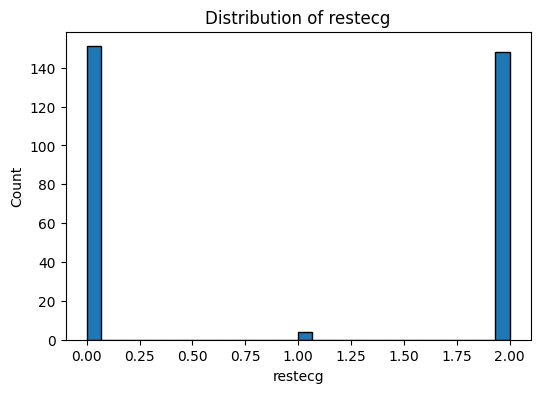

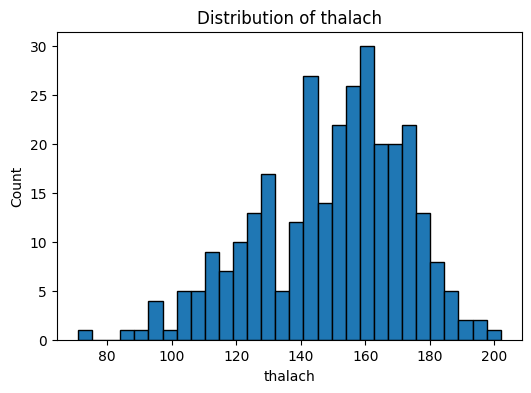

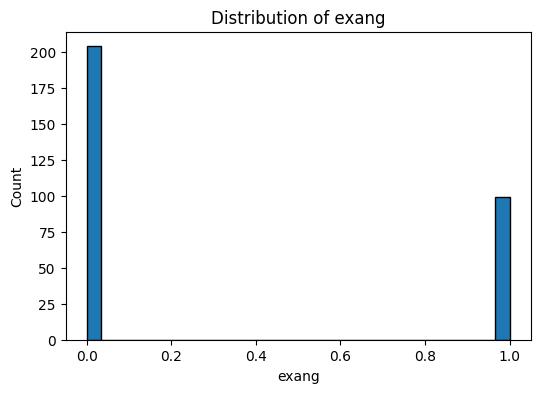

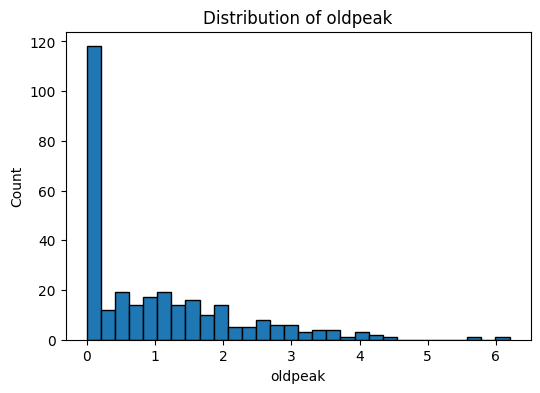

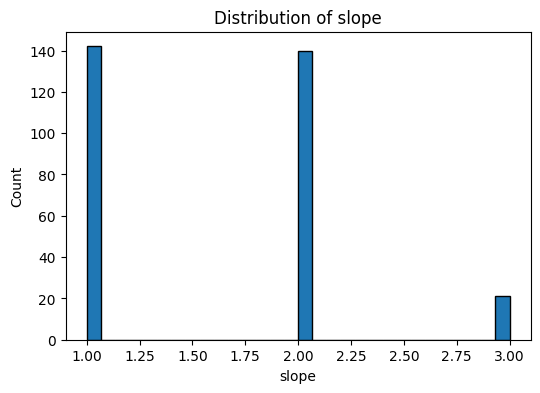

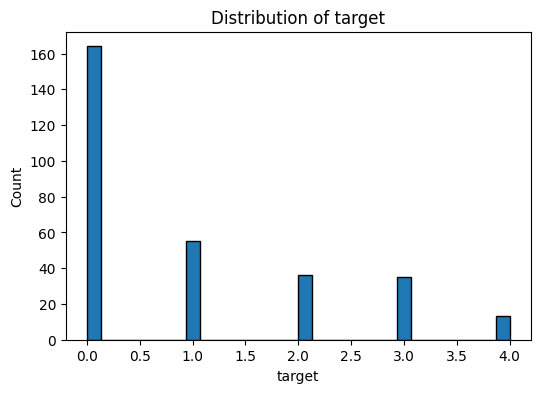

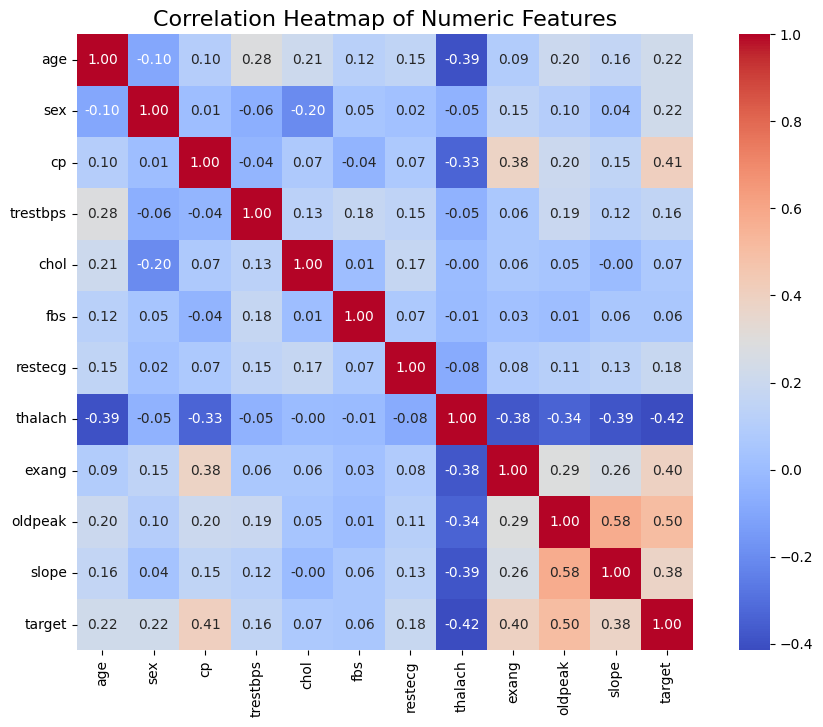

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14652\24204032.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="Set2")
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14652\24204032.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="Set2")
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14652\24204032.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="Set2")
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14652\24204032.py:30: FutureWarning: 

Pa

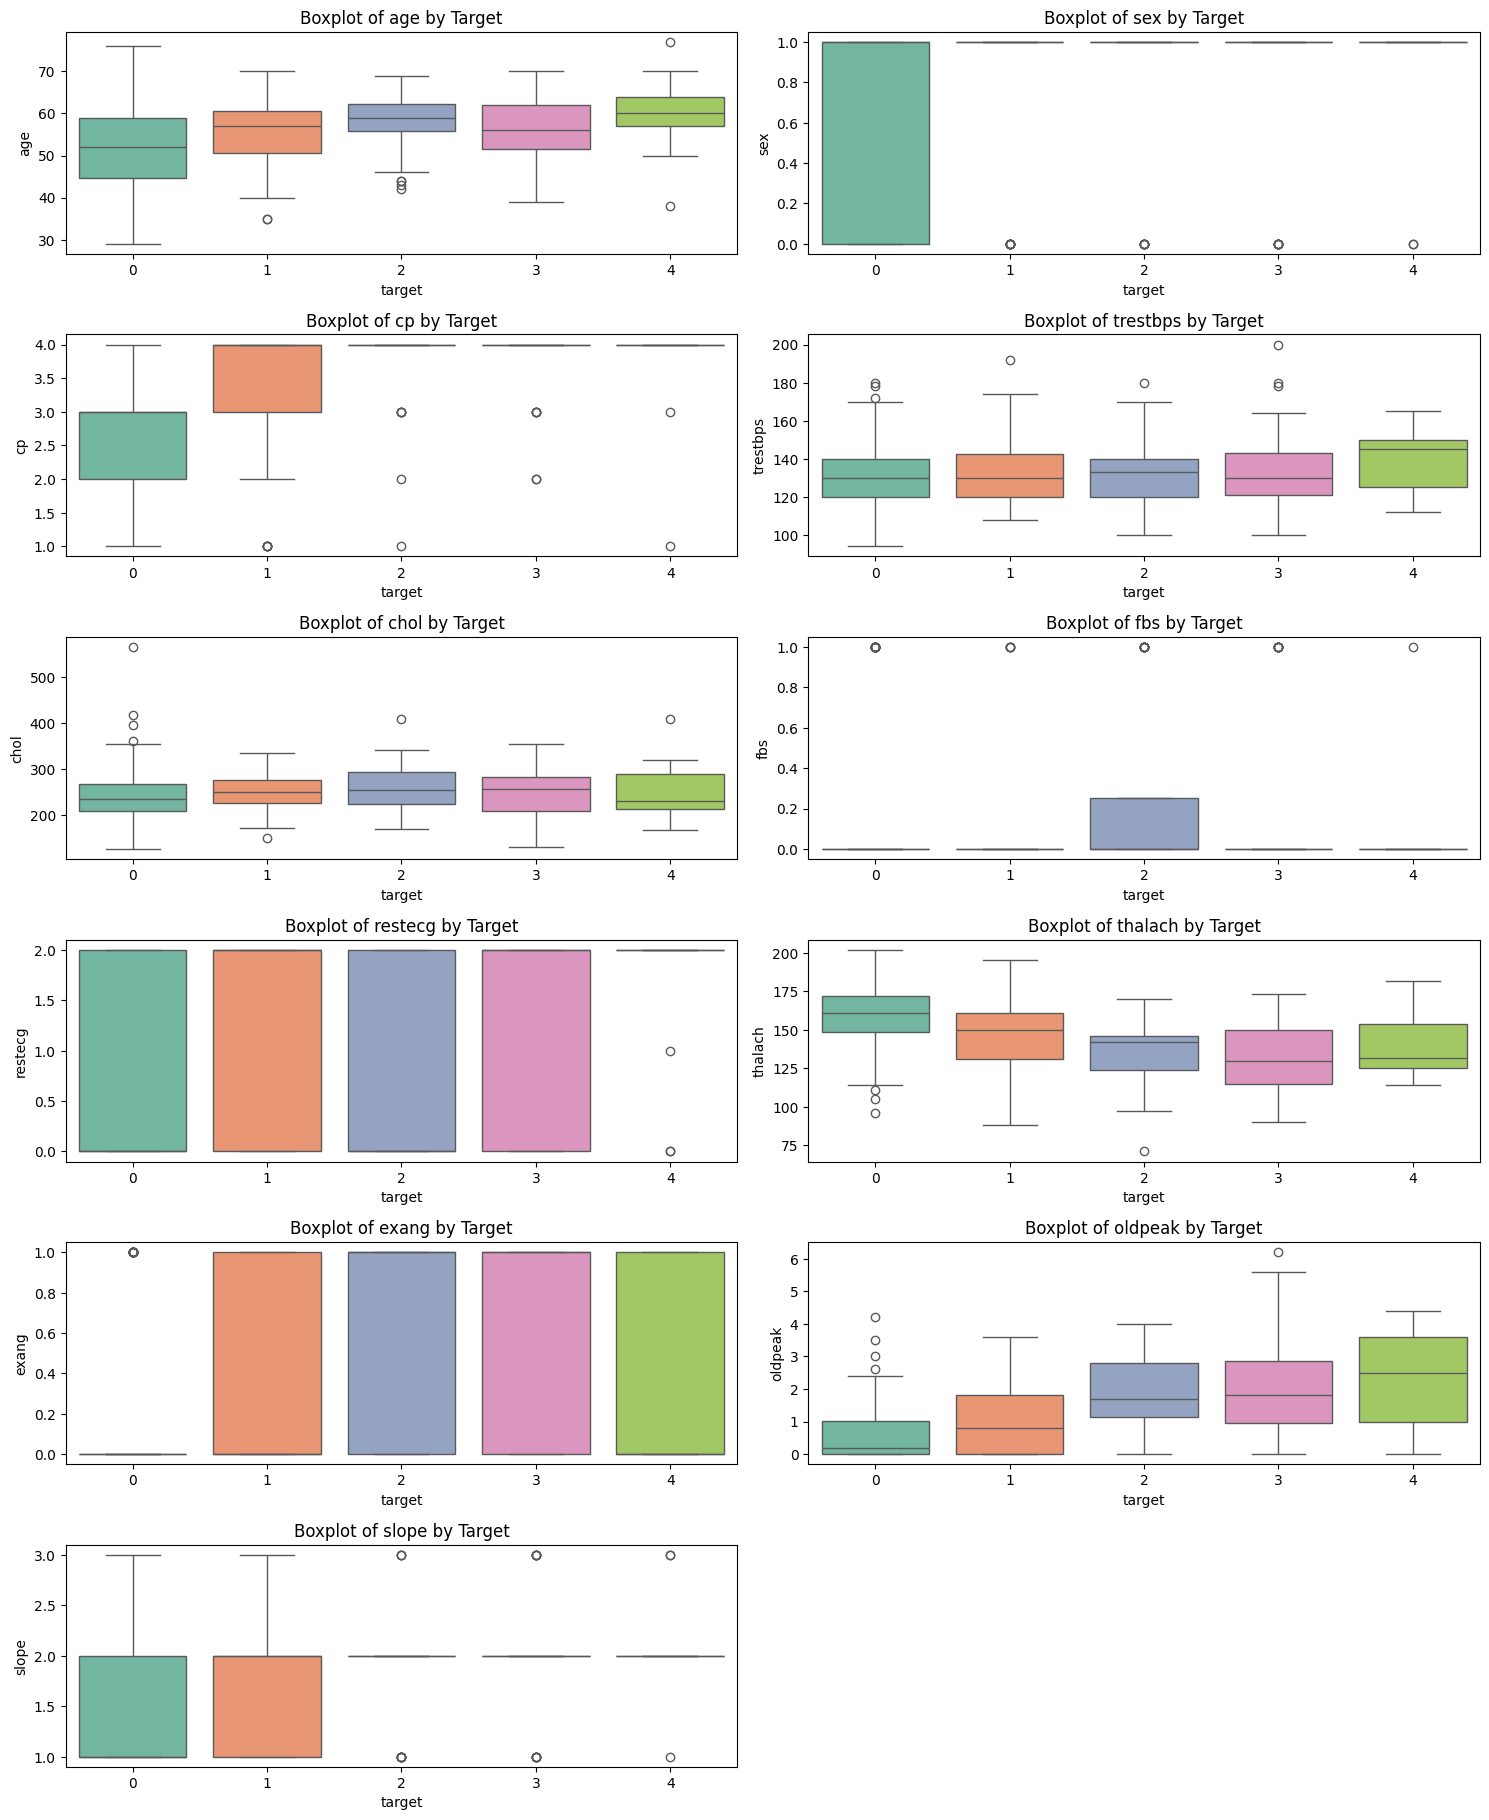

In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    df[col].hist(bins=30, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(False)
    plt.show()

# -----------------------------
# 2. Correlation Heatmap
# -----------------------------
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

# -----------------------------
# 3. Boxplots by Target
# -----------------------------
target = "target"
features = [col for col in numeric_cols if col != target]

plt.figure(figsize=(15, len(features) * 3))
for i, col in enumerate(features, 1):
    plt.subplot(len(features), 2, i)
    sns.boxplot(x=target, y=col, data=df, palette="Set2")
    plt.title(f"Boxplot of {col} by Target")

plt.tight_layout()
plt.show()

In [5]:
df = df.drop_duplicates().reset_index(drop=True)

# Handle missing values: simple strategies (feel free to refine)
for c in df.columns:
    if df[c].dtype.kind in 'biufc':
        df[c] = df[c].fillna(df[c].median())
    else:
        df[c] = df[c].fillna(df[c].mode().iloc[0])

# Ensure target column is named 'target'
# If your dataset uses 'num' or similar, rename it here:
if 'num' in df.columns and 'target' not in df.columns:
    df = df.rename(columns={'num': 'target'})

In [6]:

# Identify features/target
target_col = 'target'
y = df[target_col].astype(int)
X = df.drop(columns=[target_col])

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Scale numeric columns
scaler = StandardScaler()
num_cols = X.select_dtypes(include=[np.number]).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# Recombine for a 'cleaned' dataset
cleaned = pd.concat([X, y], axis=1)
cleaned_path = Path('../data/cleaned_heart.csv')
cleaned_path.parent.mkdir(parents=True, exist_ok=True)
cleaned.to_csv(cleaned_path, index=False)
cleaned.shape, cleaned.head()

((303, 19),
         age       sex        cp  trestbps      chol       fbs   restecg  \
 0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
 1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
 2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
 3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
 4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   
 
     thalach     exang   oldpeak     slope  ca_1.0  ca_2.0  ca_3.0   ca_?  \
 0  0.017197 -0.696631  1.087338  2.274579   False   False   False  False   
 1 -1.821905  1.435481  0.397182  0.649113   False   False    True  False   
 2 -0.902354  1.435481  1.346147  0.649113   False    True   False  False   
 3  1.637359 -0.696631  2.122573  2.274579   False   False   False  False   
 4  0.980537 -0.696631  0.310912 -0.976352   False   False   False  False   
 
    thal_6.0  thal_7.0  thal_?  target  
 0      True     False   